## Map Projection 2: MPJ260S 

### ~ Assignment 3: *Projecting Fun!*

#### Question 4

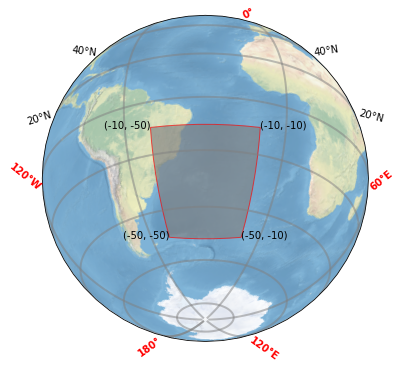

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))

#centre the projection
map_proj = ccrs.Orthographic(central_latitude=-30.0, central_longitude=-30.0)

map_proj._threshold /= 100.  # the default values is bad, users need to set them manually

ax = plt.axes(projection=map_proj)

ax.set_global()
ax.stock_img()

# add gridlines and label them
gl = ax.gridlines(draw_labels = True,
             linewidth = 2, color='gray', alpha=0.5)#, linestyle='--')
gl.xlabels_top = True
gl.ylabels_bottom = True
gl.xlines = True
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

# corners a plot spherical square
lat_corners = np.array([-50., -50., -10., -10.])
lon_corners = np.array([ -50., -10., -10., -50.]) #+ 15.0 to offset from gridline for clarity as desired

poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners

poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="grey",
                        alpha=0.65, 
                        transform=ccrs.Geodetic())
ax.add_patch(poly)

#add some text
plt.text(-30 - 20, -30 - 20, '(-50, -50)',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(-30 + 20, -30 - 20, '(-50, -10)',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(-30 + 20, -30 + 20, '(-10, -10)',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.text(-30 - 20, -30 + 20, '(-10, -50)',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

#save
plt.savefig('./img/SphericalSquare40.png')
#plot
plt.show()

#### Question 5

In [ ]:
cpt_inter = -33.9717, 18.604
tor_air = 43.6777, -79.6285

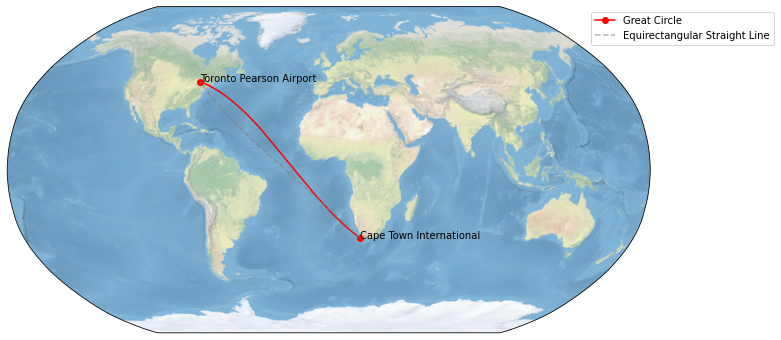

In [67]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(12, 6))

ax2 = plt.axes(projection=ccrs.Robinson())

ax2.set_global()


ax2.stock_img()

# ~~ possibly set an extent to the plot
# [lon_min, lon_max, lat_min, lat_max]
#ax2.set_extent([-100, 50, -50, 60], crs=ccrs.PlateCarree())

# ~~ line with marker  [lng1, lng2], [lat1, lat2]
plt.plot([18.604, -79.6285], [-33.9717, 43.6777], color='red',  
         marker='o', transform=ccrs.Geodetic(), label='Great Circle') 
# ~~ faint dashed line [lng1, lng2], [lat1, lat2]
plt.plot([18.604, -79.6285], [-33.9717, 43.6777], color='grey', linestyle='--',
         alpha = 0.6, label='Equirectangular Straight Line', transform=ccrs.PlateCarree())

#add legend
ax2.legend(bbox_to_anchor=(1.2, 1.0), loc='upper right')


# add some text
plt.text(18.604, -33.9717, 'Cape Town International',
         horizontalalignment='left'
         , transform=ccrs.PlateCarree()
        )

plt.text(-79.6285, 43.6777, 'Toronto Pearson Airport',
         horizontalalignment='left'
         , transform=ccrs.PlateCarree()
        )
#save
plt.savefig('./img/GreatCircle.png')
#plot
plt.show()